In [1]:
#matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import init_printing
from sympy import *

In [2]:
x, y, t = symbols('x y t')
exprs_u = -Rational(1,2)*(y**2) - 3*x**4 + y*x**3 +18*y**2*x**2 -x*y**3 -3*y**4 + Rational(1,500)
u = lambdify((x, y), exprs_u, "numpy") 

In [3]:
detm = simplify(diff(exprs_u,x,x)*diff(exprs_u,y,y) - diff(exprs_u,x,y)**2)
laplacian = simplify(diff(exprs_u,x,x)+diff(exprs_u,y,y))
jacD = lambdify((x, y), detm, "numpy") 

In [4]:
exprs_du_theta = diff(exprs_u,x)*sp.cos(t) + diff(exprs_u,y)*sp.sin(t)
du_t = lambdify((t,x, y), exprs_du_theta, "numpy")  

In [5]:
expr_G = diff(exprs_u,x,x)- 1j* diff(exprs_u,x,y)
G_funct  = lambdify((x, y), expr_G, "numpy") 
 

In [6]:
G_funct(1,1)

(6-72j)

In [7]:
init_printing(use_latex='mathjax')
expr_G

  ⎛     2            2⎞         ⎛ 2             2⎞
6⋅⎝- 6⋅x  + x⋅y + 6⋅y ⎠ - 3.0⋅ⅈ⋅⎝x  + 24⋅x⋅y - y ⎠

In [6]:
wd = 0.17
N = 700
xx, yy  = np.linspace(-wd,wd,N), np.linspace(-wd,wd,N)
X, Y = np.meshgrid(xx, yy)
Jdet = jacD(X,Y)
U = u(X,Y)
DU1 = du_t(np.pi/4,X,Y)

http://gis.stackexchange.com/questions/99917/converting-matplotlib-contour-objects-to-shapely-objects

http://stackoverflow.com/questions/5666056/matplotlib-extracting-data-from-contour-lines

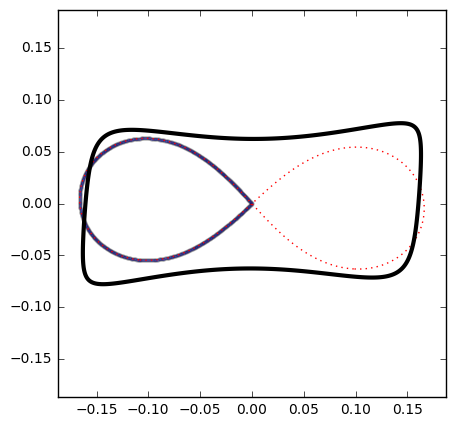

In [7]:
plt.figure(figsize=(5,5))
cs = plt.contour(X,Y, Jdet,0, linestyles='dotted', colors = 'Red')
levels = [0.0]
line_widths = (3,1)
plt.contour(X,Y, U, levels,                     # levels lot plot
                 linewidths = line_widths,            # line widths
                 colors = 'Black'                  # line widths
                 )

data = cs.collections[0].get_paths()[1]
points = data.vertices.T 
plt.scatter(points[0], points[1], s = 4,  alpha=.1)
plt.show()

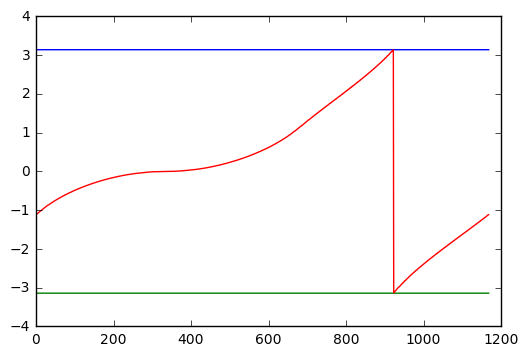

In [8]:
points = data.vertices 
G_up_points = [1*G_funct(z[0], z[1])+ 0.5+1j*0 for z in points]
argmts = np.angle(G_up_points)
plt.plot(np.pi*np.ones(len(points)))
plt.plot(-np.pi*np.ones(len(points)))
plt.plot(argmts)
plt.show()

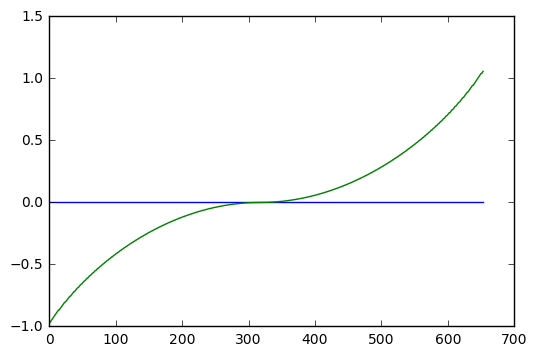

In [9]:
points[100,1] 
pts = points[points[:,0]>-0.1]
G_up_points = [2*G_funct(z[0], z[1])+ 1+1j*0 for z in pts]
argmts = np.angle(G_up_points)
plt.plot(0.0*np.pi*np.ones(len(pts)))
plt.plot(argmts)
plt.show() 
 

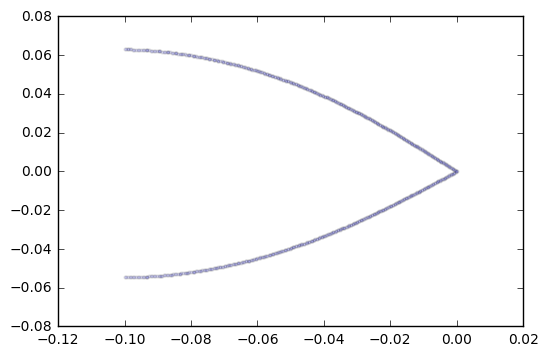

In [10]:
pts = pts.T 
plt.scatter(pts[0], pts[1], s = 4,  alpha=.1)
plt.show()

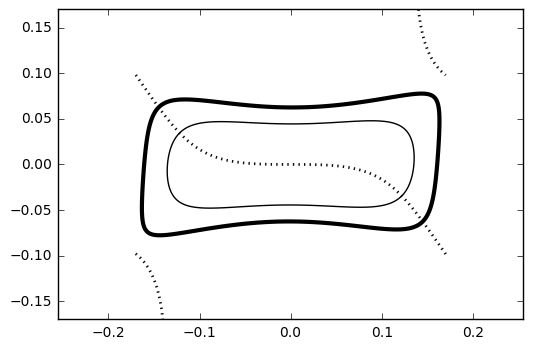

In [13]:
plt.figure()
levels = [0.000, 0.001]
line_widths = (3,1)
plt.contour(X,Y, U, levels,                     # levels lot plot
                 linewidths = line_widths,            # line widths
                 colors = 'Black'                  # line widths
                 )

levels = [0.000]
plt.contour(X,Y, DU1, levels,                     # levels lot plot
                 linewidths=2,                    # line widths
                 colors = 'Black',
                 linestyles='dotted', 
                 alpha = 0.95
                 )

plt.axes().set_aspect('equal', 'datalim')
plt.show()